# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("data.csv").sample(100000)

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5773241,400,CASH_OUT,260792.12,C4980831,0.0,0.00,C1622414159,577599.65,838391.77,0,0
4387242,313,PAYMENT,4481.00,C1655611668,34873.0,30392.00,M1131146678,0.00,0.00,0,0
6200936,576,PAYMENT,10602.93,C2094686580,168531.0,157928.07,M40193656,0.00,0.00,0,0
1278927,135,CASH_IN,204902.45,C553935135,0.0,204902.45,C285926907,427115.47,222213.01,0,0
1901227,165,PAYMENT,11206.54,C659632965,0.0,0.00,M1675465918,0.00,0.00,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.518920,1.790638e+05,8.215886e+05,8.430369e+05,1.110068e+06,1.234458e+06,0.001270,0.0
std,142.161476,5.732507e+05,2.855118e+06,2.891495e+06,3.495241e+06,3.739747e+06,0.035615,0.0
min,1.000000,2.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,156.000000,1.326014e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.474836e+04,1.419874e+04,0.000000e+00,1.322503e+05,2.118338e+05,0.000000,0.0
75%,334.000000,2.087249e+05,1.073190e+05,1.442655e+05,9.408718e+05,1.108515e+06,0.000000,0.0
max,738.000000,4.669816e+07,3.416935e+07,3.421531e+07,2.059810e+08,2.105993e+08,1.000000,0.0


### What is the distribution of the outcome? 

0    99873
1      127
Name: isFraud, dtype: int64


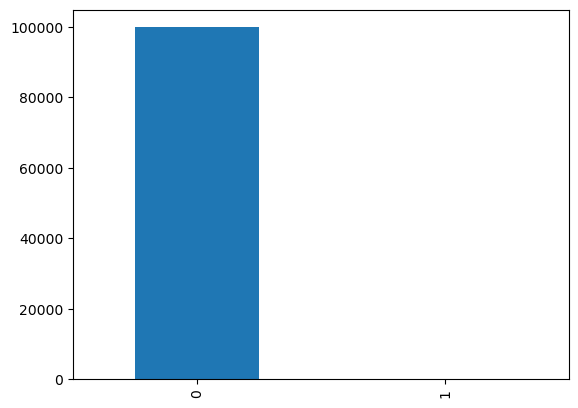

In [5]:
#assuming that the outcome here is "isFraud"
print(data["isFraud"].value_counts())
data["isFraud"].value_counts().plot(kind="bar")
plt.show()
#extemely imbalanced distribution

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [6]:
data.isnull().sum() #no nulls needed cleaned

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 5773241 to 3416958
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 9.2+ MB


In [8]:
data=data.sort_values(by=["step"])
#step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation)
#makes sense to have it as integral... if we are not treating it as time series
# if we were treating this as a time series - closing balance of one day is opening balance of next, then for the test split apply 80/20 split to sorted values

### Run a logisitc regression classifier and evaluate its accuracy.

In [16]:
X=data.drop(columns=["isFraud","type","nameOrig","nameDest"])
y=data["isFraud"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.9977

In [21]:
log_reg.score(X_train,y_train)

0.9981

In [22]:
#model seems to work suprisingly well, BUT let's check while solving imbalance

### Now pick a model of your choice and evaluate its accuracy.

In [25]:
#We are resampling the training test, not the test set. We test the data on imbalanced data
#oversampling

train = pd.concat([X_train,y_train],axis=1)

#separate minority from majority class
no_fraud=train[train["isFraud"]==0]
yes_fraud=train[train["isFraud"]==1]
print(no_fraud.shape)
print(yes_fraud.shape)

from sklearn.utils import resample
fraud_oversampled = resample(yes_fraud, #data points we want to oversample
                                    replace=True, #in oversampling, always True
                                    n_samples = len(no_fraud),
                                    random_state=0) #oversampling till it reaches the size of majority
print(fraud_oversampled.shape)

(79899, 8)
(101, 8)
(79899, 8)


In [26]:
train_oversampled=pd.concat([no_fraud,fraud_oversampled])

X_train_over = train_oversampled.drop(columns="isFraud")
y_train_over = train_oversampled["isFraud"]

#now model
log_reg = LogisticRegression()
log_reg.fit(X_train_over,y_train_over)
print(log_reg.score(X_test,y_test))
print(log_reg.score(X_train_over,y_train_over))

0.9831
0.9819271830686241


### Which model worked better and how do you know?

In [30]:
#model works worse after solving for imbalance... great.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.